# New Section

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Enter the frame numberfyc-00_1-001


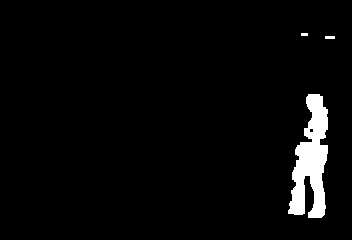

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
path = input("Enter the frame number")
ipath= '/content/gdrive/MyDrive/Project Gait Analysis/Dataset/GaitDatasetA-silh'
f=path.split('-')
fpath=ipath + '/' + f[0] + '/' +f[1] + '/' + path + '.png'
img=cv2.imread(fpath)
cv2_imshow(img)

In [ ]:
import cv2
for i in range (1, 76):
  if i<=9:
    path2 = 'fyc-00_1-00' + str(i)
  else:
    path2 =  'fyc-00_1-0' + str(i) 
  new_path = ipath + '/' + f[0] + '/' +f[1] + '/' + path2 + '.png'
# Load the input image
  img = cv2.imread(new_path)

# Check if the image was successfully loaded
  if img is None:
    print('Error: Could not load input image')
  else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Find the biggest contour
    biggest_contour = max(contours, key=cv2.contourArea)

    # Draw the biggest contour on the original image
    cv2.drawContours(img, [biggest_contour], -1, (0, 255, 0), 2)

    # Get the bounding box for the contour
    x, y, w, h = cv2.boundingRect(biggest_contour)

    # Crop the image to the bounding box
    crop = img[y:y+h, x:x+w]

    # Remove the green color from the contour highlight
    crop[np.where((crop == [0, 255, 0]).all(axis=2))] = [0, 0, 0]
    
    # Save the cropped image
    cv2.imwrite('/content/gdrive/MyDrive/Project Gait Analysis/Result/CROPPED IMAGES/cropped_img' + str(i)+'.jpg', crop)
    #cv2_imshow(crop)

In [ ]:
#List of full images
full = []
for i in range(1,76):
  crop_img_path1 = '/content/gdrive/MyDrive/Project Gait Analysis/Dataset/GaitDatasetA-silh/fyc/00_1/fyc-00_1-00' + str(i) +'.png'
  crop_img_path2 = '/content/gdrive/MyDrive/Project Gait Analysis/Dataset/GaitDatasetA-silh/fyc/00_1/fyc-00_1-0' + str(i) +'.png'
  if i<10:
    full.append(crop_img_path1)
  elif i<76:
    full.append(crop_img_path2)   

In [ ]:
import os
import cv2
import numpy as np

# Define the directory where the images are located
image_dir = '/content/gdrive/MyDrive/Project Gait Analysis/Dataset/GaitDatasetA-silh/fyc/00_1'

# Get a list of all the image file names in the directory
image_filenames = os.listdir(image_dir)

In [ ]:
# Iterate over each image file
for image_filename in image_filenames:
    # Load the image
    image = cv2.imread(os.path.join(image_dir, image_filename))
    
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Change the data type of the array to float32
    image_array = image_array.astype('float32')
    
    # Normalize the array
    image_array = cv2.normalize(image_array, None, 0, 1, cv2.NORM_MINMAX)
    
    # Do any other processing you want to do on the normalized array
    # ...

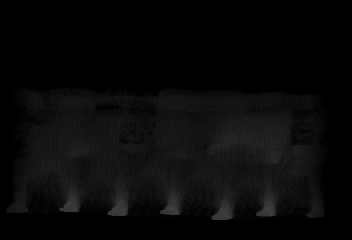

In [ ]:
import numpy as np
from PIL import Image
import cv2
# Load images into a list
images = [Image.open(f) for f in full]
# Convert images  mto NumPy arrays
image_arrays = [np.array(image) for image in images]

# Calculate average of the images
average_image = np.mean(image_arrays, axis=0)

# Convert average image back to an Image object
#average_image = Image.fromarray(np.uint8(average_image))

# Save the average image
#average_image.save('Average_image.jpg')
cv2.imwrite("/content/gdrive/MyDrive/Project Gait Analysis/Result/Average Full Image/average_image_full.jpg", average_image)
cv2_imshow(average_image)

In [ ]:
#List of cropped images
cropL = []
for i in range(1,76):
    crop_img_path = '/content/gdrive/MyDrive/Project Gait Analysis/Result/CROPPED IMAGES/CROPPED IMAGES' + str(i) +'.jpg'
    cropL.append(crop_img_path)
print(cropL[23])

/content/gdrive/MyDrive/Project Gait Analysis/Result/CROPPED IMAGES/CROPPED IMAGES24.jpg


In [ ]:
import os
import cv2
import numpy as np

# Define the directory where the images are located
image_dir = '/content/gdrive/MyDrive/Project Gait Analysis/Result/CROPPED IMAGES'

# Get a list of all the image file names in the directory
image_filenames = os.listdir(image_dir)

In [ ]:
# Iterate over each image file
for image_filename in image_filenames:
    # Load the image
    image = cv2.imread(os.path.join(image_dir, image_filename))
    
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Change the data type of the array to float32
    image_array = image_array.astype('float32')
    
    # Normalize the array
    image_array = cv2.normalize(image_array, None, 0, 1, cv2.NORM_MINMAX)
    
    # Do any other processing you want to do on the normalized array
    # ...

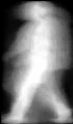

In [ ]:
import numpy as np
from PIL import Image
import cv2

# Load images into a list
images = [Image.open(f) for f in cropL]

# Get the size of the largest image
max_size = (0, 0)
for image in images:
    if image.size[0] > max_size[0]:
        max_size = image.size

# Resize all images to the size of the largest image
resized_images = [image.resize(max_size) for image in images]

# Convert images to NumPy arrays
image_arrays = [np.array(image) for image in resized_images]

# Calculate average of the images
average_image = np.mean(image_arrays, axis=0)

# Convert the average image to 8-bit integers
average_image = np.uint8(average_image)

#convert to  cv2 format
average_image = cv2.cvtColor(average_image, cv2.COLOR_RGB2BGR)

# Save the average image
cv2.imwrite("/content/gdrive/MyDrive/Project Gait Analysis/Result/Average cropped image/average_image_full.jpg", average_image)
cv2_imshow(average_image)

In [ ]:
import cv2
for i in range(1,76):
  new_path = '/content/gdrive/MyDrive/Project Gait Analysis/Result/CROPPED IMAGES/cropped_img' + str(i) +'.jpg'
# Load the image
  img = cv2.imread(new_path)
  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply binary thresholding
  ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

  # Find contours in the binary image
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  # Find the biggest contour
  biggest_contour = max(contours, key=cv2.contourArea)

# Get the bounding box of the person
  x, y, w, h = cv2.boundingRect(biggest_contour)

# Divide the bounding box into three regions (head, torso, legs)
  head = img[y:y+h//5, x:x+w]
  torso = img[y+h//5:y+(2*h)//4, x:x+w]
  legs = img[y+(2*h)//4:y+h, x:x+w]

# Save the regions
  cv2.imwrite("/content/gdrive/MyDrive/Project Gait Analysis/Result/head/head" + str(i) + ".jpg", head)
  #cv2_imshow(head)
  cv2.imwrite("/content/gdrive/MyDrive/Project Gait Analysis/Result/torso/torso" + str(i) + ".jpg", torso)
  #cv2_imshow(torso)
  cv2.imwrite("/content/gdrive/MyDrive/Project Gait Analysis/Result/legs/legs" + str(i) + ".jpg", legs)
  #cv2_imshow(legs)

In [ ]:
import cv2
import numpy as np
head_cen_x=[]
head_cen_y=[]

for i in range(1,76):
  new_path = "/content/gdrive/MyDrive/Project Gait Analysis/Result/head/head" + str(i) + ".jpg"
  # Load image
  image = cv2.imread(new_path)

  # Convert image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Threshold image to create a binary image
  ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  # Find contours in the binary image
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

  # Find the largest contour (assuming it corresponds to the body)
  largest_contour = max(contours, key=cv2.contourArea)

  # Find the moments of the largest contour
  moments = cv2.moments(largest_contour)
  if moments["m00"]==0:
    continue
  else :
    # Calculate the centroid of the contour
    centroid_x = int(moments["m10"] / moments["m00"])
    centroid_y = int(moments["m01"] / moments["m00"])

    #append centroid in list
    head_cen_x.append(centroid_x)
    head_cen_y.append(centroid_y)

  # Print the centroid
  #print("Centroid of the body: (", centroid_x, ",", centroid_y, ")")

In [ ]:
import cv2
import numpy as np
torso_cen_x=[]
torso_cen_y=[]

for i in range(1,76):
  new_path = "/content/gdrive/MyDrive/Project Gait Analysis/Result/torso/torso" + str(i) + ".jpg"
  # Load image
  image = cv2.imread(new_path)

  # Convert image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Threshold image to create a binary image
  ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  # Find contours in the binary image
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

  # Find the largest contour (assuming it corresponds to the body)
  largest_contour = max(contours, key=cv2.contourArea)

  # Find the moments of the largest contour
  moments = cv2.moments(largest_contour)
  if moments["m00"]==0:
    continue
  else :
    # Calculate the centroid of the contour
    centroid_x = int(moments["m10"] / moments["m00"])
    centroid_y = int(moments["m01"] / moments["m00"])

    #append centroid in list
    torso_cen_x.append(centroid_x)
    torso_cen_y.append(centroid_y)

  # Print the centroid
  #print("Centroid of the body: (", centroid_x, ",", centroid_y, ")")

In [ ]:
import cv2
import numpy as np
legs_cen_x=[]
legs_cen_y=[]

for i in range(1,76):
  new_path = "/content/gdrive/MyDrive/Project Gait Analysis/Result/legs/legs" + str(i) + ".jpg"
  # Load image
  image = cv2.imread(new_path)

  # Convert image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Threshold image to create a binary image
  ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  # Find contours in the binary image
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

  # Find the largest contour (assuming it corresponds to the body)
  largest_contour = max(contours, key=cv2.contourArea)

  # Find the moments of the largest contour
  moments = cv2.moments(largest_contour)
  if moments["m00"]==0:
    continue
  else :
    # Calculate the centroid of the contour
    centroid_x = int(moments["m10"] / moments["m00"])
    centroid_y = int(moments["m01"] / moments["m00"])

    #append centroid in list
    legs_cen_x.append(centroid_x)
    legs_cen_y.append(centroid_y)

  # Print the centroid
  #print("Centroid of the body: (", centroid_x, ",", centroid_y, ")")

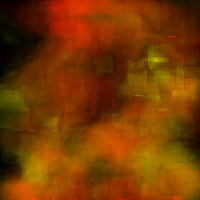

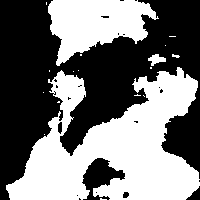

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
def optical_flow_mean(images_folder):
    image_paths = [os.path.join(images_folder, f) for f in os.listdir(images_folder) if f.endswith(".jpg")]
    image_paths.sort()
    
    common_size = (200, 200)
    prev_gray = None
    sum_of_flow = None
    num_images = 0
    
    for i in range(0, len(image_paths), 2):
        if i + 1 >= len(image_paths):
          break
        else:
            current_image = cv2.imread(image_paths[i])
            current_image = cv2.resize(current_image, common_size)
            current_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
            next_image = cv2.imread(image_paths[i + 1])
            next_image = cv2.resize(next_image, common_size)
            next_gray = cv2.cvtColor(next_image, cv2.COLOR_BGR2GRAY)
            if prev_gray is None:
                prev_gray = current_gray
            flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            if sum_of_flow is None:
                sum_of_flow = np.abs(flow)
            else:
                sum_of_flow += np.abs(flow)
            prev_gray = next_gray
            num_images += 2

    avg_flow = sum_of_flow / num_images
    avg_flow = (avg_flow * 255 / np.max(avg_flow)).astype(np.uint8)
    return avg_flow

folder = "/content/gdrive/MyDrive/Project Gait Analysis/Result/CROPPED IMAGES"
avg_flow = optical_flow_mean(folder)
cv2.waitKey(0)
cv2.destroyAllWindows()
def visualize_flow(flow):
    h, w = flow.shape[:2]
    hsv = np.zeros((h, w, 3), dtype=np.float32)
    hsv[..., 1] = 255
    flow_magnitude, flow_angle = cv2.cartToPolar(flow[..., 0].astype(np.float32), flow[..., 1].astype(np.float32))
    hsv[..., 0] = flow_angle * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(flow_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    bgr = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)
    return bgr
def visualize_flow_bw(flow):
    h, w = flow.shape[:2]
    flow_magnitude, flow_angle = cv2.cartToPolar(flow[..., 0].astype(np.float32), flow[..., 1].astype(np.float32))
    flow_magnitude = cv2.normalize(flow_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    _, bw = cv2.threshold(flow_magnitude, 128, 255, cv2.THRESH_BINARY)
    return bw

avg_flow = optical_flow_mean(folder)
bgr = visualize_flow(avg_flow)
cv2_imshow(bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

avg_flow = optical_flow_mean(folder)
bgr = visualize_flow_bw(avg_flow)
cv2_imshow(bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

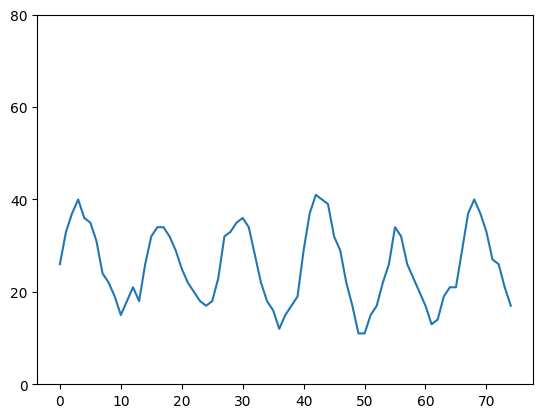

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
arr=np.array(head_cen_x)

plt.plot(head_cen_x)
plt.yticks(range(0, 100, 20))

# Show the plot
plt.show()

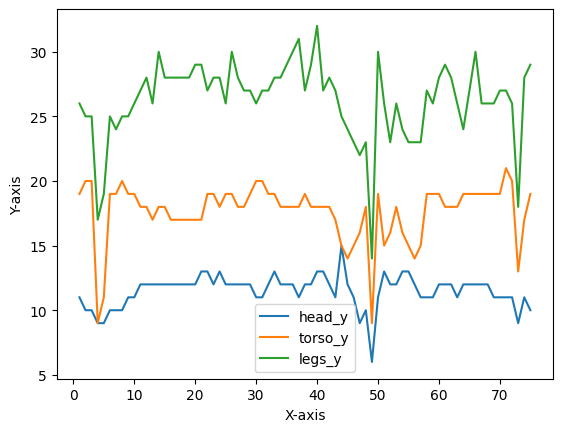

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create some data
x = []
for i in range(1,76):
  x.append(i)

y1=head_cen_y
y2=torso_cen_y
y3=legs_cen_y
plt.plot(x, y1, label='head_y')
plt.plot(x, y2, label='torso_y')
plt.plot(x, y3, label='legs_y')

# Add legend and axis labels
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot the data
#plt.plot(x, y)

plt.show()

In [ ]:
pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 6.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
# Convert the list to a pandas DataFrame
df_head = pd.DataFrame({'id': 'head', 'time': range(len(head_cen_x)), 'x':head_cen_x, 'y':head_cen_y})
df_torso=pd.DataFrame({'id': 'torso', 'time': range(len(torso_cen_x)), 'x':torso_cen_x, 'y':torso_cen_y})
df_legs=pd.DataFrame({'id': 'legs', 'time': range(len(legs_cen_x)), 'x':legs_cen_x, 'y':legs_cen_y})
df=pd.concat([df_head, df_torso,df_legs],axis=0)
print(df)

      id  time   x   y
0   head     0  26  11
1   head     1  33  10
2   head     2  37  10
3   head     3  40   9
4   head     4  36   9
..   ...   ...  ..  ..
70  legs    70  32  27
71  legs    71  28  26
72  legs    72  24  18
73  legs    73  21  28
74  legs    74  17  29

[225 rows x 4 columns]


In [ ]:
from tsfresh import extract_features
import pandas as pd

#my_list=head_cen_x
# Convert the list to a pandas DataFrame
#df = pd.DataFrame({'time': range(len(my_list)), 'data': my_list})
# Define the column types
#column_types = {'time': 'float', 'data': 'list_float'}

# Extract the features
extracted_features = extract_features(df, column_id="id", column_sort="time", column_kind=None, column_value=None)
print(extracted_features)


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00,  9.52it/s]

       x__variance_larger_than_standard_deviation  x__has_duplicate_max  \
head                                          1.0                   0.0   
legs                                          1.0                   0.0   
torso                                         1.0                   1.0   

       x__has_duplicate_min  x__has_duplicate  x__sum_values  x__abs_energy  \
head                    1.0               1.0         1917.0        54111.0   
legs                    0.0               1.0         1653.0        40375.0   
torso                   0.0               1.0         1876.0        52334.0   

       x__mean_abs_change  x__mean_change  x__mean_second_derivative_central  \
head             3.743243       -0.121622                          -0.075342   
legs             3.689189       -0.013514                          -0.075342   
torso            3.797297       -0.067568                          -0.102740   

       x__median  ...  y__fourier_entropy__bins_5  \
head    

In [ ]:
import tsfresh
from tsfresh import extract_features
import numpy
timeseries=[head_cen_x,head_cen_y,torso_cen_x,torso_cen_y,legs_cen_x,legs_cen_y]
features=[]
for i in timeseries:
  arr=numpy.array(i)
  f=[]
  a=tsfresh.feature_extraction.feature_calculators.abs_energy(arr)
  b=tsfresh.feature_extraction.feature_calculators.mean(arr)
  c=tsfresh.feature_extraction.feature_calculators.sample_entropy(arr)
  d=tsfresh.feature_extraction.feature_calculators.standard_deviation(arr)
  e=tsfresh.feature_extraction.feature_calculators.skewness(arr)
  df_features= pd.DataFrame({'id': i, 'time': '5', 'abs_energy':a, 'mean':b,'sample_entropy':c,'standard_deviation':d,'skewness':e})
print(df_features)